In [1]:
import numpy as np                # For numerical computing
import pandas as pd               # For data manipulation and analysis
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For enhanced data visualization
import sklearn                    # For machine learning algorithms


In [2]:
data=pd.read_csv("The mistral.csv")

In [3]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,STATUS_,bplayer0,product_id,category_id,category_code,brand,price,PaymentMode
0,T1,C5841053,10/1/94,Male,JAMSHEDPUR,17819.05,2023-02-08,143207.0,1.0,Vayne,3900821.0,2.053014e+18,appliances.environment.water_heater,aqua,2988.0,Credit Card
1,T2,C2142763,4/4/57,Female,JHAJJAR,2270.69,2023-02-08,141858.0,1.0,Kled,1307067.0,2.053014e+18,computers.notebook,lenovo,22656.6,Online Payment
2,T3,C4417068,26/11/96,Female,MUMBAI,17874.44,2023-02-08,142712.0,1.0,Darius,1004237.0,2.053014e+18,electronics.smartphone,apple,97378.2,Online Payment
3,T4,C5342380,14/9/73,Female,MUMBAI,866503.21,2023-02-08,142714.0,1.0,Singed,1480613.0,2.053014e+18,computers.desktop,pulser,81775.8,Credit Card
4,T5,C9031234,24/3/88,Male,NAVI MUMBAI,6714.43,2023-02-08,181156.0,1.0,Urgot,28719074.0,2.053014e+18,apparel.shoes.keds,baden,9243.9,Cash on Delivery


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40051 entries, 0 to 40050
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionID       40051 non-null  object 
 1   CustomerID          40051 non-null  object 
 2   CustomerDOB         39880 non-null  object 
 3   CustGender          40051 non-null  object 
 4   CustLocation        40048 non-null  object 
 5   CustAccountBalance  40003 non-null  float64
 6   TransactionDate     40050 non-null  object 
 7   TransactionTime     40050 non-null  float64
 8   STATUS_             40050 non-null  float64
 9   bplayer0            40050 non-null  object 
 10  product_id          40050 non-null  float64
 11  category_id         40050 non-null  float64
 12  category_code       40050 non-null  object 
 13  brand               40050 non-null  object 
 14  price               40050 non-null  float64
 15  PaymentMode         40050 non-null  object 
dtypes: f

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

TransactionID           0
CustomerID              0
CustomerDOB           171
CustGender              0
CustLocation            3
CustAccountBalance     48
TransactionDate         1
TransactionTime         1
STATUS_                 1
bplayer0                1
product_id              1
category_id             1
category_code           1
brand                   1
price                   1
PaymentMode             1
dtype: int64


In [6]:
# Filling missing values for categorical variables with mode
data['CustomerDOB'].fillna(data['CustomerDOB'].mode()[0], inplace=True)
data['CustLocation'].fillna(data['CustLocation'].mode()[0], inplace=True)
data['brand'].fillna(data['brand'].mode()[0], inplace=True)
data['PaymentMode'].fillna(data['PaymentMode'].mode()[0], inplace=True)

# Filling missing values for numerical variables with median
data['CustAccountBalance'].fillna(data['CustAccountBalance'].median(), inplace=True)
data['price'].fillna(data['price'].median(), inplace=True)

# Drop rows with missing values in TransactionDate and TransactionTime columns
data.dropna(subset=['TransactionDate', 'TransactionTime'], inplace=True)


In [7]:
data.isnull().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
STATUS_               0
bplayer0              0
product_id            0
category_id           0
category_code         0
brand                 0
price                 0
PaymentMode           0
dtype: int64

In [8]:
# Convert CustAccountBalance column from float to int
data['CustAccountBalance'] = data['CustAccountBalance'].astype(int)
data['price']= data['price'].astype(int)

In [9]:
data.tail(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,STATUS_,bplayer0,product_id,category_id,category_code,brand,price,PaymentMode
40045,T40046,C6118785,23/10/90,Female,MUMBAI,286,2023-09-27,201545.0,1.0,Nasus,1005021.0,2.053014e+18,electronics.smartphone,oppo,34745,Online Payment
40046,T40047,C7426331,29/5/85,Male,KARNAL,42498,2023-09-27,195424.0,1.0,Gangplank,11000256.0,2.053014e+18,appliances.kitchen.toster,unit,1526,Cash on Delivery
40047,T40048,C1829935,29/1/81,Female,JHAJJAR,27614,2023-09-27,195427.0,1.0,Garen,5100626.0,2.053014e+18,electronics.clocks,apple,49785,Cash
40048,T40049,C5319624,10/2/93,Female,RAJKOT,7327,2023-09-27,215724.0,1.0,Darius,1003306.0,2.053014e+18,electronics.smartphone,apple,52880,Credit Card
40049,T40050,C3320566,21/12/91,Male,SRIPERUMBUDUR,18426,2023-09-22,134203.0,1.0,Akali,1004856.0,2.053014e+18,electronics.smartphone,samsung,11768,Online Payment


In [10]:
# Splitting CustomerDOB column into year, month, and day columns
data[[ 'DOB_Day','DOB_Month','DOB_Year',]] = data['CustomerDOB'].str.split('/', expand=True)

# Convert the data type of the newly created columns to integer
data['DOB_Year'] = data['DOB_Year'].astype(int)
data['DOB_Month'] = data['DOB_Month'].astype(int)
data['DOB_Day'] = data['DOB_Day'].astype(int)

# Drop the original CustomerDOB column
data.drop(columns=['CustomerDOB'], inplace=True)


In [11]:
data . head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,STATUS_,bplayer0,product_id,category_id,category_code,brand,price,PaymentMode,DOB_Day,DOB_Month,DOB_Year
0,T1,C5841053,Male,JAMSHEDPUR,17819,2023-02-08,143207.0,1.0,Vayne,3900821.0,2.053014e+18,appliances.environment.water_heater,aqua,2988,Credit Card,10,1,94
1,T2,C2142763,Female,JHAJJAR,2270,2023-02-08,141858.0,1.0,Kled,1307067.0,2.053014e+18,computers.notebook,lenovo,22656,Online Payment,4,4,57
2,T3,C4417068,Female,MUMBAI,17874,2023-02-08,142712.0,1.0,Darius,1004237.0,2.053014e+18,electronics.smartphone,apple,97378,Online Payment,26,11,96
3,T4,C5342380,Female,MUMBAI,866503,2023-02-08,142714.0,1.0,Singed,1480613.0,2.053014e+18,computers.desktop,pulser,81775,Credit Card,14,9,73
4,T5,C9031234,Male,NAVI MUMBAI,6714,2023-02-08,181156.0,1.0,Urgot,28719074.0,2.053014e+18,apparel.shoes.keds,baden,9243,Cash on Delivery,24,3,88


In [12]:
bplayer0_details = data['bplayer0'].value_counts()
print(bplayer0_details)

Sett           2124
Garen          1838
Darius         1691
Mordekaiser    1648
Urgot          1598
               ... 
Elise             3
Braum             2
Evelynn           1
Nami              1
Sona              1
Name: bplayer0, Length: 154, dtype: int64


In [13]:
# Drop the bplayer0 column from the dataset
data.drop(columns=['bplayer0'], inplace=True)


In [14]:
data.describe()

,CustAccountBalance,TransactionTime,STATUS_,product_id,category_id,price,DOB_Day,DOB_Month,DOB_Year
count,4.005000e+04,40050.000000,40050.0,4.005000e+04,4.005000e+04,40050.000000,40050.000000,40050.000000,40050.000000
mean,1.180848e+05,172170.529114,1.0,5.363302e+06,2.055217e+18,31636.790662,14.023346,6.161099,84.994207
std,6.544220e+05,42543.399636,0.0,8.030879e+06,1.369242e+16,35698.183155,9.332191,3.550756,9.327266
min,0.000000e+00,2.000000,1.0,1.001588e+06,2.053014e+18,79.000000,1.000000,1.000000,0.000000
25%,5.496500e+03,145548.500000,1.0,1.004839e+06,2.053014e+18,8977.000000,5.000000,3.000000,82.000000
50%,1.910300e+04,184353.000000,1.0,1.700380e+06,2.053014e+18,17779.000000,14.000000,6.000000,87.000000
75%,6.443900e+04,203129.000000,1.0,5.100797e+06,2.053014e+18,41080.000000,22.000000,9.000000,91.000000
max,5.099967e+07,235951.000000,1.0,5.290004e+07,2.172371e+18,231666.000000,31.000000,12.000000,99.000000


In [15]:
# Value counts for each column



cust_gender_counts = data['CustGender'].value_counts()
cust_location_counts = data['CustLocation'].value_counts()
cust_balance_counts = data['CustAccountBalance'].value_counts()
transaction_date_counts = data['TransactionDate'].value_counts()

status_counts = data['STATUS_'].value_counts()


category_code_counts = data['category_code'].value_counts()
brand_counts = data['brand'].value_counts()
price_counts = data['price'].value_counts()
payment_mode_counts = data['PaymentMode'].value_counts()

# Display value counts


print("\nCustGender value counts:\n", cust_gender_counts)
print("\nCustLocation value counts:\n", cust_location_counts)
print("\nCustAccountBalance value counts:\n", cust_balance_counts)
print("\nTransactionDate value counts:\n", transaction_date_counts)

print("\nSTATUS_ value counts:\n", status_counts)

print("\ncategory_code value counts:\n", category_code_counts)
print("\nbrand value counts:\n", brand_counts)
print("\nprice value counts:\n", price_counts)
print("\nPaymentMode value counts:\n", payment_mode_counts)



CustGender value counts:
 Male      23654
Female    16396
Name: CustGender, dtype: int64

CustLocation value counts:
 BANGALORE                            4849
MUMBAI                               4056
NEW DELHI                            3176
KOLKATA                              2806
GURGAON                              2757
                                     ... 
PATTIVEERANPATTI                        1
TEH GURGAON DISTT GURGAON GURGAON       1
TOWERS AHMEDABAD                        1
TARAN TARAN                             1
CHOWK NASHIK                            1
Name: CustLocation, Length: 2564, dtype: int64

CustAccountBalance value counts:
 0        226
2         69
6         53
19103     49
1         48
        ... 
17225      1
35471      1
3883       1
18220      1
18426      1
Name: CustAccountBalance, Length: 22126, dtype: int64

TransactionDate value counts:
 2023-09-26    12460
2023-09-25     8164
2023-09-27     5346
2023-09-22     4447
2023-10-21     3539
2023-09-

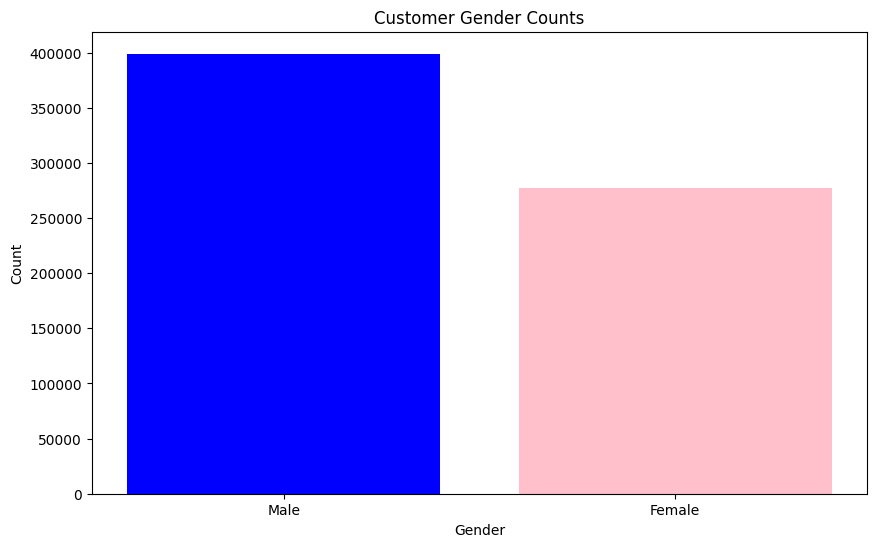

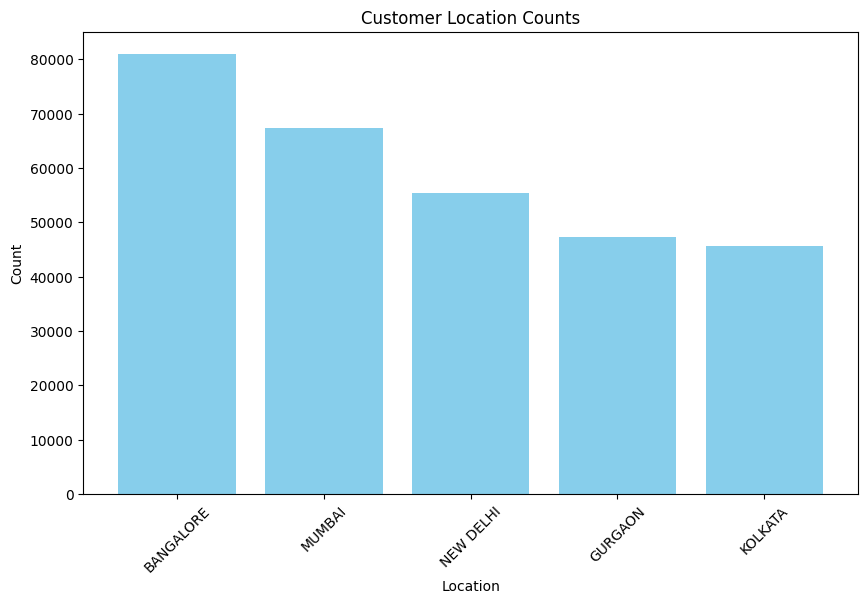

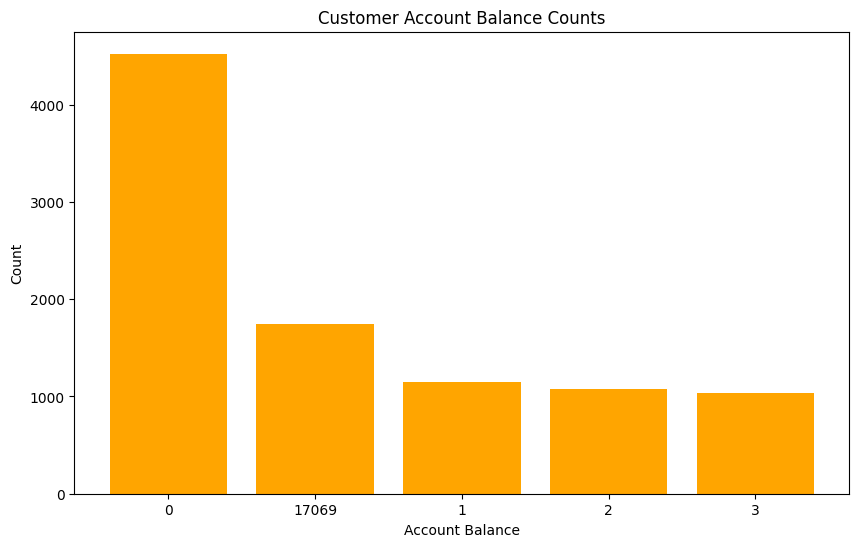

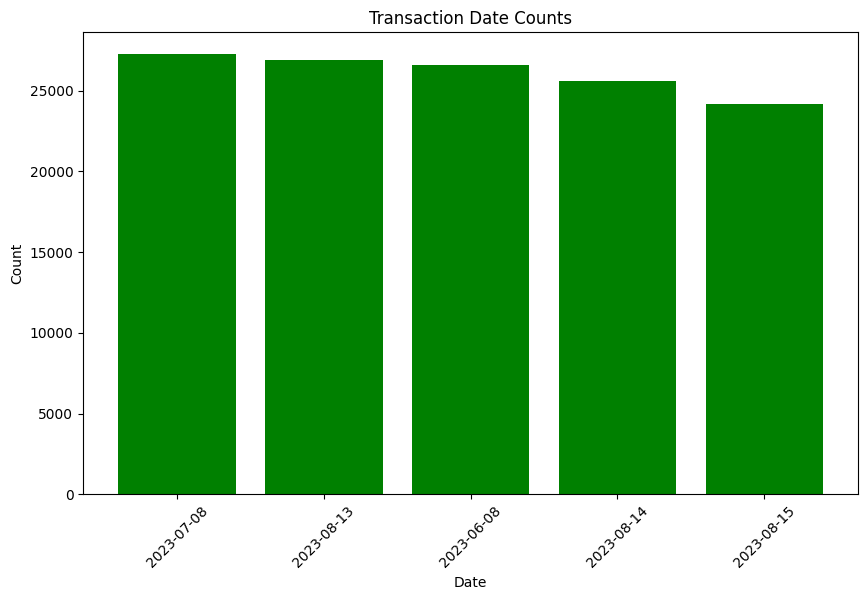

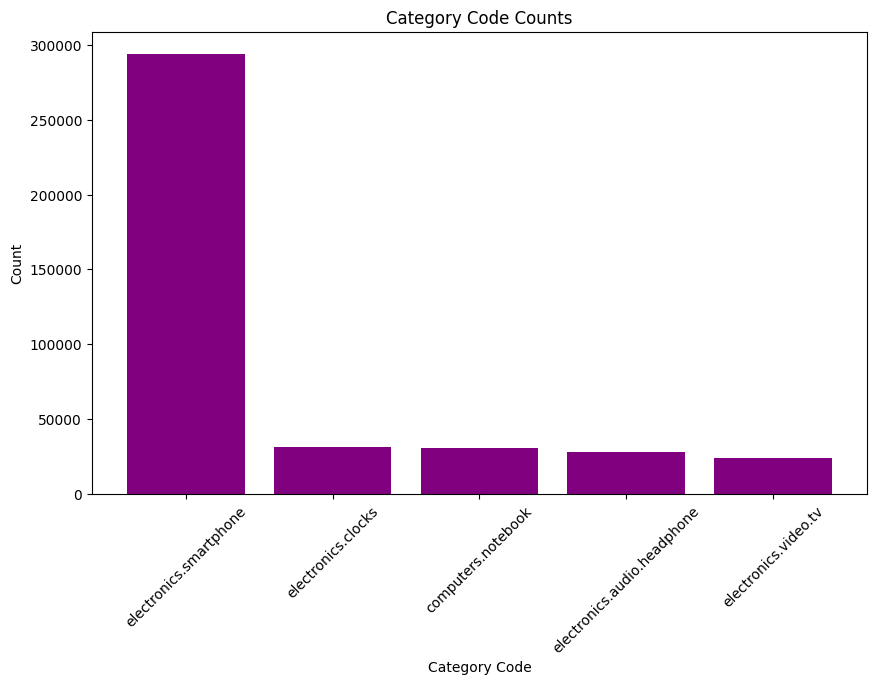

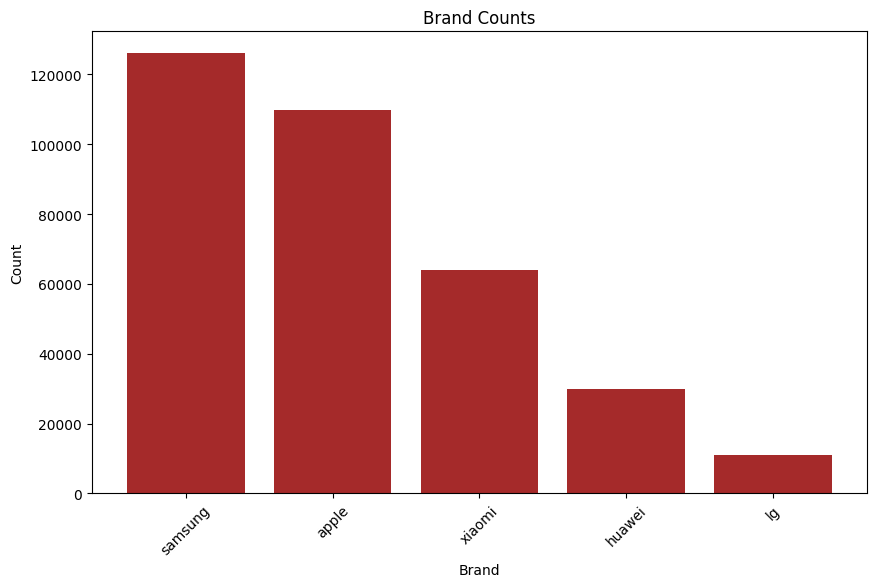

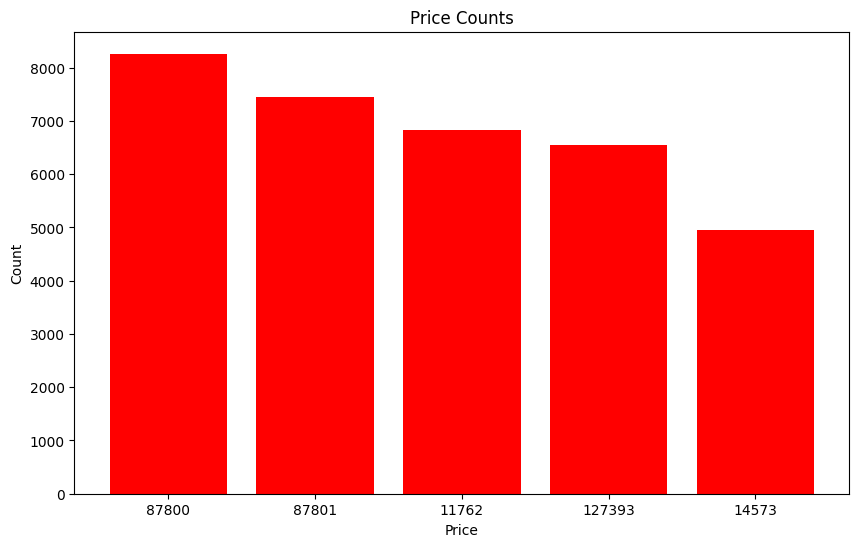

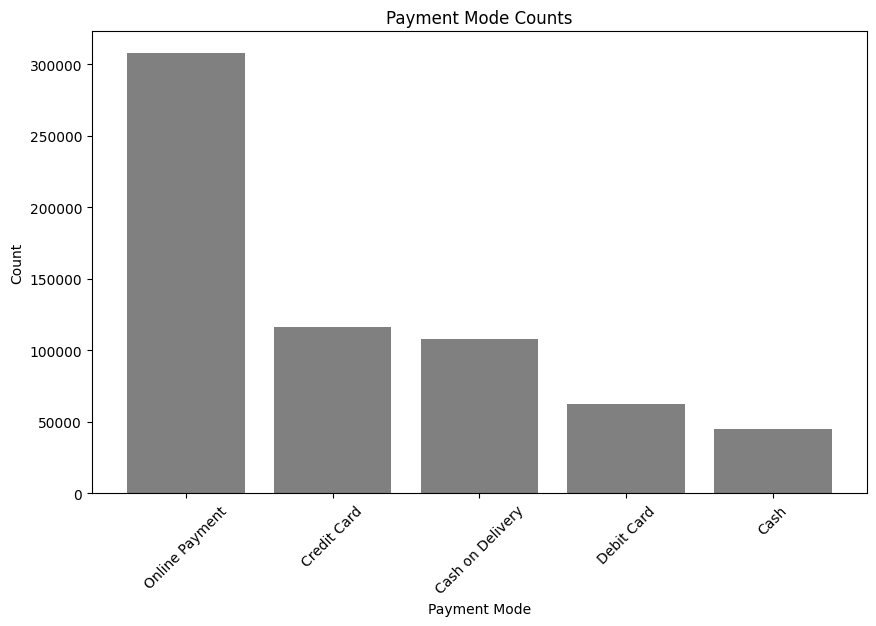

In [16]:
import matplotlib.pyplot as plt

# CustGender Counts
cust_gender_counts = {'Male': 399191, 'Female': 277484}
plt.figure(figsize=(10, 6))
plt.bar(cust_gender_counts.keys(), cust_gender_counts.values(), color=['blue', 'pink'])
plt.title('Customer Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# CustLocation Counts
cust_location_counts = {'BANGALORE': 81032, 'MUMBAI': 67442, 'NEW DELHI': 55424, 'GURGAON': 47263, 'KOLKATA': 45562}
plt.figure(figsize=(10, 6))
plt.bar(cust_location_counts.keys(), cust_location_counts.values(), color='skyblue')
plt.title('Customer Location Counts')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# CustAccountBalance Counts
cust_balance_counts = {'0': 4525, '17069': 1750, '1': 1149, '2': 1072, '3': 1033}
plt.figure(figsize=(10, 6))
plt.bar(cust_balance_counts.keys(), cust_balance_counts.values(), color='orange')
plt.title('Customer Account Balance Counts')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.show()

# TransactionDate Counts
transaction_date_counts = {'2023-07-08': 27256, '2023-08-13': 26916, '2023-06-08': 26578, '2023-08-14': 25594, '2023-08-15': 24165}
plt.figure(figsize=(10, 6))
plt.bar(transaction_date_counts.keys(), transaction_date_counts.values(), color='green')
plt.title('Transaction Date Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# CategoryCode Counts
category_code_counts = {'electronics.smartphone': 294001, 'electronics.clocks': 31559, 'computers.notebook': 30903,
                        'electronics.audio.headphone': 28160, 'electronics.video.tv': 23865}
plt.figure(figsize=(10, 6))
plt.bar(category_code_counts.keys(), category_code_counts.values(), color='purple')
plt.title('Category Code Counts')
plt.xlabel('Category Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Brand Counts
brand_counts = {'samsung': 126017, 'apple': 109761, 'xiaomi': 64033, 'huawei': 29844, 'lg': 10876}
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.keys(), brand_counts.values(), color='brown')
plt.title('Brand Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Price Counts
price_counts = {'87800': 8261, '87801': 7443, '11762': 6833, '127393': 6539, '14573': 4943}
plt.figure(figsize=(10, 6))
plt.bar(price_counts.keys(), price_counts.values(), color='red')
plt.title('Price Counts')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# PaymentMode Counts
payment_mode_counts = {'Online Payment': 307604, 'Credit Card': 115980, 'Cash on Delivery': 107868,
                       'Debit Card': 62220, 'Cash': 44858}
plt.figure(figsize=(10, 6))
plt.bar(payment_mode_counts.keys(), payment_mode_counts.values(), color='gray')
plt.title('Payment Mode Counts')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


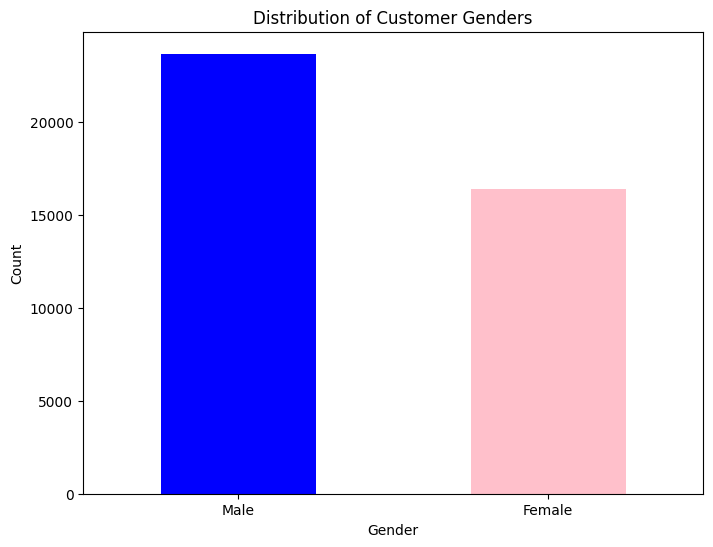

In [17]:


# Count of each gender
gender_counts = data['CustGender'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Customer Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


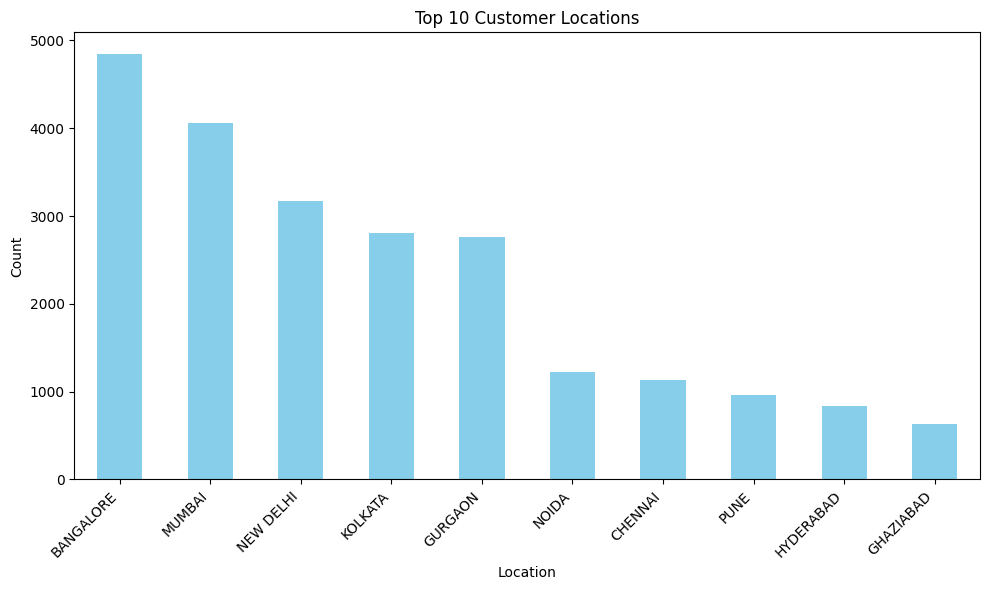

In [18]:
# Get the top 10 locations by count
top_locations = data['CustLocation'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


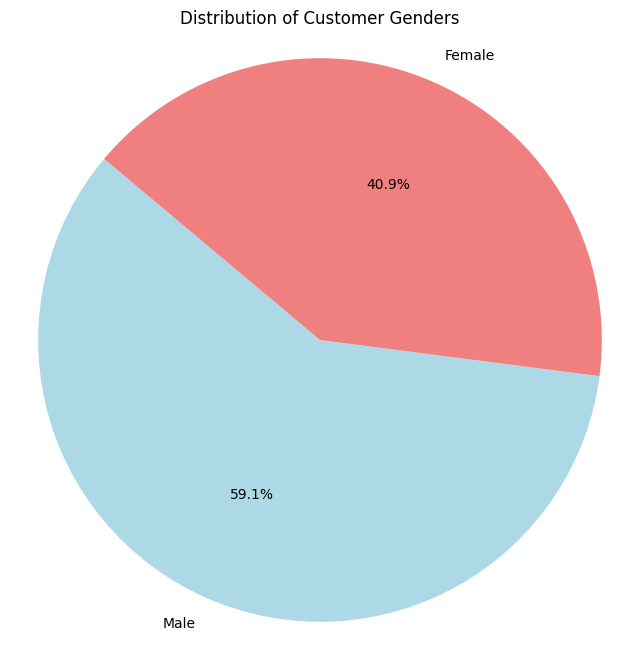

In [19]:
# Get the count of each gender
gender_counts = data['CustGender'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Customer Genders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


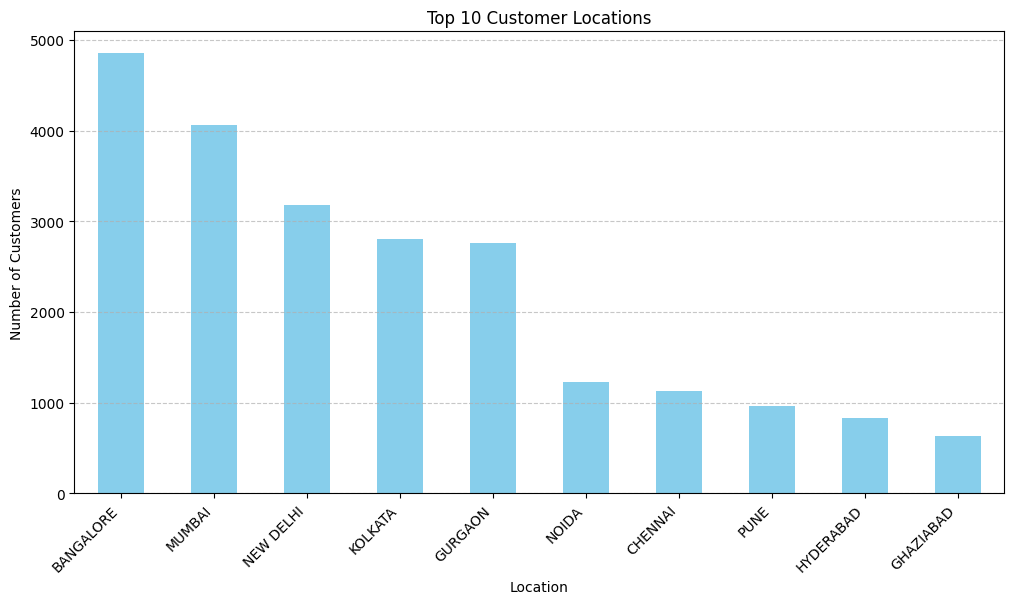